# Polynomial Feature Mapping , Dataset B

In [1]:
#pandas, numpy, matplotlib, sklearn libraries were used here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('data_prob3_partb.csv')
from sklearn.model_selection import train_test_split
df.columns
df.head()

,Input feature 1,Input feature 2,Output label
0,0.95800,-0.575,1.0
1,0.00799,0.140,1.0
2,1.38000,-0.551,1.0
3,-0.36300,0.960,0.0
4,0.46000,0.701,0.0


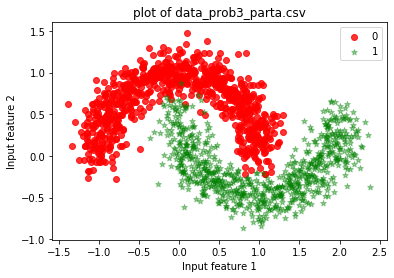

In [2]:
#This the given data plot of 'data_prob3_partb.csv'
plt.scatter(df['Input feature 1'][df['Output label']==0.0], df['Input feature 2'][df['Output label']==0.0],color='red',marker='o',alpha=0.8,label='0')
plt.scatter(df['Input feature 1'][df['Output label']==1.0], df['Input feature 2'][df['Output label']==1.0],color='green',marker='*',alpha=0.4,label='1')
plt.xlabel('Input feature 1')
plt.ylabel('Input feature 2')
plt.title('plot of data_prob3_parta.csv')
plt.legend()
plt.show()

In [3]:
#This here is used (x_1, x_2) to (x_1, x_2, x_1^2, x_2^2, x_1^3, x_2^3, ..., x_1^T, x_2^T)
df['x1']=df['Input feature 1']
df['x2']=df['Input feature 2']
df['x3']=df['Output label']
df.drop(['Input feature 1','Input feature 2','Output label'],axis=1,inplace=True)

In [4]:
#here value of T is the highest degree.
Tp=9
for i in range(2,Tp+1):
    df['x1_{}'.format(i)]=df['x1']**i
    df['x2_{}'.format(i)]=df['x2']**i
df['Output label']=df['x3']

In [5]:
#df
df.head()

,x1,x2,x3,x1_2,x2_2,x1_3,x2_3,x1_4,x2_4,x1_5,x2_5,x1_6,x2_6,x1_7,x2_7,x1_8,x2_8,x1_9,x2_9,Output label
0,0.95800,-0.575,1.0,0.917764,0.330625,8.792179e-01,-0.190109,8.422908e-01,0.109313,8.069145e-01,-0.062855,7.730241e-01,0.036142,7.405571e-01,-0.020781,7.094537e-01,1.194931e-02,6.796567e-01,-6.870852e-03,1.0
1,0.00799,0.140,1.0,0.000064,0.019600,5.100824e-07,0.002744,4.075558e-09,0.000384,3.256371e-11,0.000054,2.601841e-13,0.000008,2.078871e-15,0.000001,1.661018e-17,1.475789e-07,1.327153e-19,2.066105e-08,1.0
2,1.38000,-0.551,1.0,1.904400,0.303601,2.628072e+00,-0.167284,3.626739e+00,0.092174,5.004900e+00,-0.050788,6.906762e+00,0.027984,9.531332e+00,-0.015419,1.315324e+01,8.495966e-03,1.815147e+01,-4.681278e-03,1.0
3,-0.36300,0.960,0.0,0.131769,0.921600,-4.783215e-02,0.884736,1.736307e-02,0.849347,-6.302794e-03,0.815373,2.287914e-03,0.782758,-8.305129e-04,0.751447,3.014762e-04,7.213896e-01,-1.094359e-04,6.925340e-01,0.0
4,0.46000,0.701,0.0,0.211600,0.491401,9.733600e-02,0.344472,4.477456e-02,0.241475,2.059630e-02,0.169274,9.474297e-03,0.118661,4.358177e-03,0.083181,2.004761e-03,5.831015e-02,9.221902e-04,4.087541e-02,0.0


In [6]:
#Here X is the input parameter and Y output parameter converted into array.
X=df[df.columns[:-1]]
Y=df['Output label']

In [7]:
#df files.
Columns=df.columns
Columns

Index(['x1', 'x2', 'x3', 'x1_2', 'x2_2', 'x1_3', 'x2_3', 'x1_4', 'x2_4',
       'x1_5', 'x2_5', 'x1_6', 'x2_6', 'x1_7', 'x2_7', 'x1_8', 'x2_8', 'x1_9',
       'x2_9', 'Output label'],
      dtype='object')

In [8]:
#This give the unique value of the output labels.
Length=len(df['Output label'])
df['Output label'].unique()

array([1., 0.])

In [9]:
bycomp=df.groupby('Output label')
bycomp.count()

,x1,x2,x3,x1_2,x2_2,x1_3,x2_3,x1_4,x2_4,x1_5,x2_5,x1_6,x2_6,x1_7,x2_7,x1_8,x2_8,x1_9,x2_9
Output label,,,,,,,,,,,,,,,,,,,
0.0,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750
1.0,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750,750


In [10]:
#Test and train data sets are splitted using train_test_split.
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.75,random_state=32)

 Build the logistic regression model using the training data. 

 The scikit library can be used to build the model. Bonus marks will be awarded if the model is built from scratch without using any external libraries. If you are writing your own implementation, try to keep number of features and number of classes as variables for next parts.

## By Scratch

#### Gradient descent method

In [11]:
## sigmoid function.
def sigmoid(thetax):
    return 1/(1+np.exp(-thetax))

In [12]:
#Where M is the no of features
M=len(Columns)-1
Learning_rate=0.00005

In [13]:
#theta_values=np.zeros(M+1)
theta_values=np.zeros(M+1)
cost_value=[]
h=np.zeros(np.array(X_train[Columns[0]]).size)
for i in range(M):
    h += np.array(X_train[Columns[i]])*theta_values[i+1]
h += theta_values[0]
h=sigmoid(h)
y=np.array(y_train)
diff1=h-y
final_diff=np.zeros(M+1)
for j in range(M):
    final_diff[j+1]=np.dot(diff1,np.array(X_train[Columns[j]]))
final_diff[0]=np.sum(diff1)
final_diff=final_diff/Length
t_values=theta_values-(Learning_rate*final_diff)
theta_values=t_values
cost=np.sum(y*np.log(h)+(1-y)*np.log(1-h))*-1
cost_value.append(cost)


epochs=0
tmp=1

while tmp>10**-3:
    h=np.zeros(np.array(X_train[Columns[0]]).size)
    for i in range(M):
        h += np.array(X_train[Columns[i]])*theta_values[i+1]
    h += theta_values[0]
    h=sigmoid(h)
    y=np.array(y_train)
    diff1=h-y
    final_diff=np.zeros(M+1)
    for j in range(M):
        final_diff[j+1]=np.dot(diff1,np.array(X_train[Columns[j]]))
    final_diff[0]=np.sum(diff1)
    final_diff=final_diff/Length
    t_values=theta_values-(Learning_rate*final_diff)
    theta_values=t_values
    cost=np.sum(y*np.log(h)+(1-y)*np.log(1-h))*-1
    tmp=cost_value[len(cost_value)-1]-cost
    cost_value.append(cost)
    epochs+=1
print(theta_values)

[-3.19388756e-04  6.74842364e-04 -9.09210311e-04  9.01363301e-04
  7.30903637e-05 -4.50854784e-04  9.53973961e-04 -5.84605812e-04
  8.23709118e-04 -4.79378041e-04  2.02355077e-03 -5.48812439e-04
  2.69332721e-03 -5.54892966e-04  5.10825791e-03 -6.41817063e-04
  7.96464766e-03 -7.26987835e-04  1.42042328e-02 -8.77891601e-04]


G:\installation\Python\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log
G:\installation\Python\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply


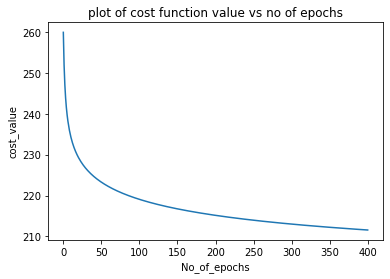

In [14]:
plt.plot(np.arange(epochs+1),np.array(cost_value))
plt.xlabel('No_of_epochs')
plt.ylabel('cost_value')
plt.title('plot of cost function value vs no of epochs')
plt.show()

#### Testing data

In [15]:
h_hat=np.zeros(np.array(X_test[Columns[0]]).size)
for i in range(M):
    h_hat += np.array(X_test[Columns[i]])*theta_values[i+1]
h_hat += theta_values[0]
h_hat=sigmoid(h_hat)
y_hat=np.array(y_test)

for i in range(len(h_hat)):
    tmp_value=h_hat[i]
    if tmp_value>=0.5:
        h_hat[i]=1
    else:
        h_hat[i]=0  
h_hat

array([1., 0., 0., ..., 0., 1., 1.])

In [16]:
## decision boundary values.

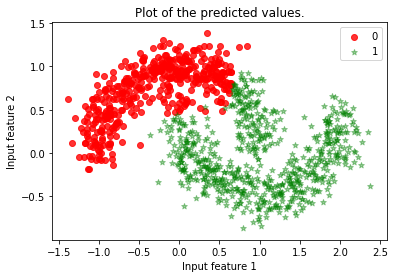

In [17]:
#This is the plot of after the predictions(after using logistic regression model.)
plt.scatter(X_test['x1'][h_hat==0.0], X_test['x2'][h_hat==0.0],color='red',marker='o',alpha=0.8,label='0')
plt.scatter(X_test['x1'][h_hat==1.0], X_test['x2'][h_hat==1.0],color='green',marker='*',alpha=0.4,label='1')
plt.xlabel('Input feature 1')
plt.ylabel('Input feature 2')
plt.title('Plot of the predicted values.')
plt.legend()
plt.show()

In [18]:
### finding accuracy on tetsing data.
accur=0
for i in range(len(h_hat)):
    if h_hat[i]==y_hat[i]:
        accur+=1
    else:
        accur+=0
accur=accur/len(h_hat)
print(accur*100) 

84.26666666666667


## By scikit library method

In [19]:
#scikit library was used to built this model from which logistic regression was called.
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
predictions=log.predict(X_test)

In [20]:
#This are the predicted values.
predictions

array([1., 0., 0., ..., 0., 1., 1.])

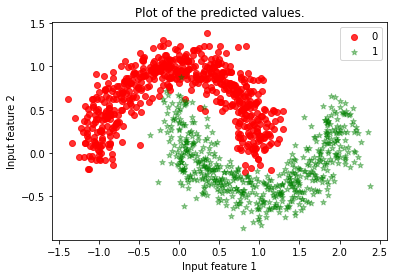

In [21]:
#This is the plot of after the predictions(after using logistic regression model.)
plt.scatter(X_test['x1'][predictions==0.0], X_test['x2'][predictions==0.0],color='red',marker='o',alpha=0.8,label='0')
plt.scatter(X_test['x1'][predictions==1.0], X_test['x2'][predictions==1.0],color='green',marker='*',alpha=0.4,label='1')
plt.xlabel('Input feature 1')
plt.ylabel('Input feature 2')
plt.title('Plot of the predicted values.')
plt.legend()
plt.show()

In [22]:
#This code gives us accuracy.
total=0
l=len(predictions)
accuracy_3=0
y_test=np.array(y_test)
for i in range(l):
    if predictions[i]==y_test[i]:
        total += 1

accuracy_3=total/l
print(accuracy_3*100)     


100.0
